In [564]:
import random

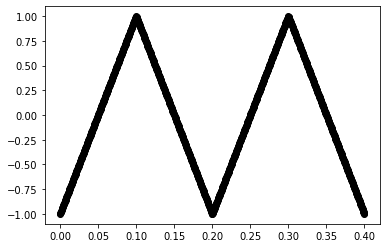

In [565]:
# https://stackoverflow.com/a/34864714/12840171
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
# t = np.linspace(0, 0.4, 50)
# t = np.linspace(0, 0.4, 10)
t = np.linspace(0, 0.4, 1000)
triangle = signal.sawtooth(2 * np.pi * 5 * t, 0.5)
plt.plot(t, triangle, 'k-o')

In [566]:
import tensorflow as tf

In [567]:
def build_model(units, activation='relu', kernel_initializer='glorot_uniform'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units, input_shape=(1,), activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(units, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(1, kernel_initializer=kernel_initializer)
    ])
    return model

In [568]:
# kernel_initializer='glorot_uniform'
kernel_initializer='he_uniform'
# model = build_model(256, activation='tanh', kernel_initializer=kernel_initializer)
model = build_model(256, activation='relu', kernel_initializer=kernel_initializer)

In [569]:
model.compile(loss='mse', optimizer='adam')

In [570]:
%%time
history = model.fit(t, triangle, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 941us/step - loss: 0.3477
Epoch 2/1000
32/32 [==============================] - 0s 983us/step - loss: 0.3342
Epoch 3/1000
32/32 [==============================] - 0s 978us/step - loss: 0.3026
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3066
Epoch 6/1000
32/32 [==============================] - 0s 949us/step - loss: 0.2751
Epoch 7/1000
32/32 [==============================] - 0s 936us/step - loss: 0.2764
Epoch 8/1000
32/32 [==============================] - 0s 975us/step - loss: 0.2756
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2635
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2827
Epoch 11/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2590
Epoch 12/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2812
Epoch 13/1000

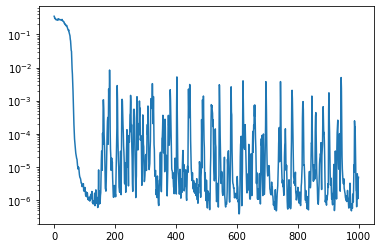

In [571]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

In [572]:
yhat = model.predict(t)

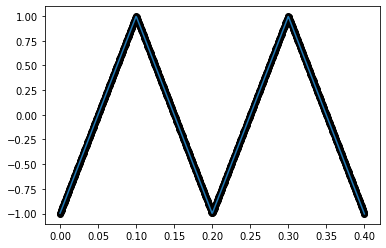

In [573]:
plt.figure()
plt.plot(t, triangle, 'k-o')
plt.plot(t, yhat)

In [574]:
len(model.weights)

6

In [575]:
model.weights[0]

<tf.Variable 'dense_504/kernel:0' shape=(1, 256) dtype=float32, numpy=
array([[ 1.3384852e+00,  2.2277339e+00,  1.8666532e+00, -2.4382329e-01,
        -5.4030585e-01,  1.9977819e+00, -2.2603128e+00, -2.3081748e+00,
        -1.7642909e+00, -1.2303052e+00,  6.6474956e-01,  6.1675125e-01,
        -2.3999856e+00,  1.8602551e+00, -1.3095335e+00,  2.1183038e+00,
         1.1206909e+00, -2.0343535e+00,  6.4713889e-01,  5.1873583e-01,
        -1.3278444e+00,  2.1247981e+00,  2.0760298e+00, -1.2021632e+00,
         2.6776549e-01, -4.9718356e-01,  2.3536980e+00,  1.1238666e-01,
         9.9658608e-01, -1.2983329e+00,  2.1433182e+00, -1.9799087e+00,
        -1.9583437e+00, -1.4020170e+00, -9.2326808e-01, -3.6529783e-02,
         2.0656078e+00, -8.4397554e-01,  5.7813728e-01, -5.0269186e-01,
        -2.1232436e+00, -1.4349296e+00,  2.2007930e+00, -1.1107030e+00,
         1.2126722e+00,  2.3495698e+00, -1.9908214e+00, -1.3813392e+00,
        -1.0401810e+00,  2.2159302e+00,  1.5551820e+00,  1.045219

In [576]:
model.weights[1]

<tf.Variable 'dense_504/bias:0' shape=(256,) dtype=float32, numpy=
array([-1.34871855e-01, -2.23022401e-01, -1.87823054e-04,  0.00000000e+00,
        0.00000000e+00, -4.21858113e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.33046642e-01, -1.23487756e-01,
        0.00000000e+00, -1.87318727e-01,  0.00000000e+00, -2.13631585e-01,
       -2.31590033e-01,  0.00000000e+00, -1.94350660e-01, -5.19669205e-02,
        0.00000000e+00,  2.00232446e-01, -2.08380908e-01,  0.00000000e+00,
        2.67628759e-01,  0.00000000e+00, -1.32241994e-01,  4.35086846e-01,
       -1.79461971e-01,  0.00000000e+00, -3.01610202e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.92147607e-01,
       -2.07976669e-01,  0.00000000e+00, -5.79484291e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.67803928e-01,  0.00000000e+00,
       -1.23222552e-01, -2.35281855e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.436781

In [577]:
t[:, np.newaxis].shape

(1000, 1)

In [578]:
# tf.matmul(tf.convert_to_tensor(t[:, np.newaxis], dtype=tf.float32), model.weights[0].numpy())

# plot 'feature curves'

In [579]:
# def get_intermediate_output(model, layer_index, w_index, b_index, input_tensor):
    
    
#     w = model.weights[w_index].numpy()
#     b = model.weights[b_index].numpy()
    
#     print(input_tensor.shape)
#     print(w.shape)
#     print(b.shape)
    
#     act = model.layers[layer_index].activation
    
#     return act(tf.matmul(input_tensor, w) + b)

In [580]:
def get_intermediate_output(model, layer_index, input_tensor):
    
    
    w = model.layers[layer_index].get_weights()[0]
    b = model.layers[layer_index].get_weights()[1]
    
    print(f"input: {input_tensor.shape}")
    print(f"w: {w.shape}")
    print(f"b: {b.shape}")
    
    act = model.layers[layer_index].activation
    
    out = act(tf.matmul(input_tensor, w) + b)
    
    print(f"out: {out.shape}")
    
    return out

In [581]:
input_tensor = tf.convert_to_tensor(t[:,np.newaxis], dtype=tf.float32)

In [582]:
model.layers[0].activation

<function tensorflow.python.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)>

In [583]:
model.layers[0].get_weights()

[array([[ 1.3384852e+00,  2.2277339e+00,  1.8666532e+00, -2.4382329e-01,
         -5.4030585e-01,  1.9977819e+00, -2.2603128e+00, -2.3081748e+00,
         -1.7642909e+00, -1.2303052e+00,  6.6474956e-01,  6.1675125e-01,
         -2.3999856e+00,  1.8602551e+00, -1.3095335e+00,  2.1183038e+00,
          1.1206909e+00, -2.0343535e+00,  6.4713889e-01,  5.1873583e-01,
         -1.3278444e+00,  2.1247981e+00,  2.0760298e+00, -1.2021632e+00,
          2.6776549e-01, -4.9718356e-01,  2.3536980e+00,  1.1238666e-01,
          9.9658608e-01, -1.2983329e+00,  2.1433182e+00, -1.9799087e+00,
         -1.9583437e+00, -1.4020170e+00, -9.2326808e-01, -3.6529783e-02,
          2.0656078e+00, -8.4397554e-01,  5.7813728e-01, -5.0269186e-01,
         -2.1232436e+00, -1.4349296e+00,  2.2007930e+00, -1.1107030e+00,
          1.2126722e+00,  2.3495698e+00, -1.9908214e+00, -1.3813392e+00,
         -1.0401810e+00,  2.2159302e+00,  1.5551820e+00,  1.0452197e+00,
         -1.9655060e+00, -2.0515180e-01,  2.2532964

In [584]:
# output = get_intermediate_output(model, 0, 0, 1, input_tensor)
output = get_intermediate_output(model, 0, input_tensor)

input: (1000, 1)
w: (1, 256)
b: (256,)
out: (1000, 256)


In [585]:
# output2 = get_intermediate_output(model, 1, 2, 3, output)
output2 = get_intermediate_output(model, 1, output)

input: (1000, 256)
w: (256, 256)
b: (256,)
out: (1000, 256)


In [586]:
# output3 = get_intermediate_output(model, 2, 4, 5, output2)
output3 = get_intermediate_output(model, 2, output2)

input: (1000, 256)
w: (256, 1)
b: (1,)
out: (1000, 1)


In [587]:
model.layers[2].get_weights()

[array([[-5.91029972e-03],
        [-1.32211074e-01],
        [ 6.35329783e-02],
        [-1.15346067e-01],
        [ 1.30746454e-01],
        [ 2.85392702e-02],
        [ 1.27693281e-01],
        [-2.19193939e-03],
        [ 2.97096446e-02],
        [-4.45331708e-02],
        [-7.26840869e-02],
        [-1.19523481e-01],
        [-6.64889812e-04],
        [ 4.60350551e-02],
        [-1.48815647e-01],
        [-9.41422954e-02],
        [ 8.19887444e-02],
        [-2.46110067e-01],
        [ 6.23736531e-02],
        [ 8.30669524e-05],
        [-5.76616712e-02],
        [ 1.33882567e-01],
        [ 1.31658062e-01],
        [ 5.23950625e-03],
        [ 4.59082425e-02],
        [ 5.77136059e-04],
        [-6.94619641e-02],
        [-2.67989542e-02],
        [ 7.20376894e-02],
        [ 1.09569274e-01],
        [ 1.15832448e-01],
        [-4.53568883e-02],
        [-8.80975723e-02],
        [-2.28110805e-01],
        [-4.15337123e-02],
        [-8.96409750e-02],
        [ 9.88837108e-02],
 

In [588]:
t

array([0.        , 0.0004004 , 0.0008008 , 0.0012012 , 0.0016016 ,
       0.002002  , 0.0024024 , 0.0028028 , 0.0032032 , 0.0036036 ,
       0.004004  , 0.0044044 , 0.0048048 , 0.00520521, 0.00560561,
       0.00600601, 0.00640641, 0.00680681, 0.00720721, 0.00760761,
       0.00800801, 0.00840841, 0.00880881, 0.00920921, 0.00960961,
       0.01001001, 0.01041041, 0.01081081, 0.01121121, 0.01161161,
       0.01201201, 0.01241241, 0.01281281, 0.01321321, 0.01361361,
       0.01401401, 0.01441441, 0.01481481, 0.01521522, 0.01561562,
       0.01601602, 0.01641642, 0.01681682, 0.01721722, 0.01761762,
       0.01801802, 0.01841842, 0.01881882, 0.01921922, 0.01961962,
       0.02002002, 0.02042042, 0.02082082, 0.02122122, 0.02162162,
       0.02202202, 0.02242242, 0.02282282, 0.02322322, 0.02362362,
       0.02402402, 0.02442442, 0.02482482, 0.02522523, 0.02562563,
       0.02602603, 0.02642643, 0.02682683, 0.02722723, 0.02762763,
       0.02802803, 0.02842843, 0.02882883, 0.02922923, 0.02962

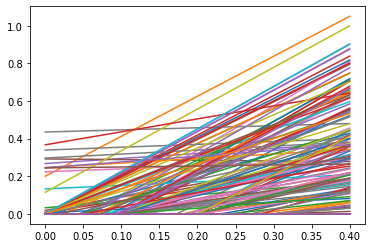

In [589]:
plt.figure()
for o in range(output.shape[1]):
    plt.plot(t, output.numpy()[:,o])

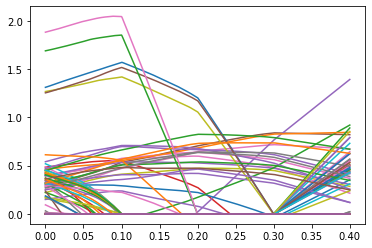

In [590]:
plt.figure()
for o in range(output2.shape[1]):
    plt.plot(t, output2.numpy()[:,o])

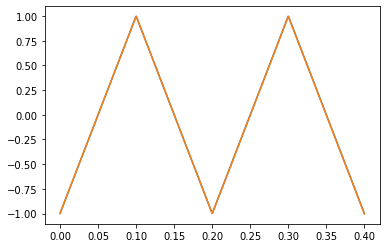

In [591]:
plt.figure()
plt.plot(t, triangle)
for o in range(output3.shape[1]):
    plt.plot(t, output3.numpy()[:,o])

In [592]:
model.layers[2].get_weights()

[array([[-5.91029972e-03],
        [-1.32211074e-01],
        [ 6.35329783e-02],
        [-1.15346067e-01],
        [ 1.30746454e-01],
        [ 2.85392702e-02],
        [ 1.27693281e-01],
        [-2.19193939e-03],
        [ 2.97096446e-02],
        [-4.45331708e-02],
        [-7.26840869e-02],
        [-1.19523481e-01],
        [-6.64889812e-04],
        [ 4.60350551e-02],
        [-1.48815647e-01],
        [-9.41422954e-02],
        [ 8.19887444e-02],
        [-2.46110067e-01],
        [ 6.23736531e-02],
        [ 8.30669524e-05],
        [-5.76616712e-02],
        [ 1.33882567e-01],
        [ 1.31658062e-01],
        [ 5.23950625e-03],
        [ 4.59082425e-02],
        [ 5.77136059e-04],
        [-6.94619641e-02],
        [-2.67989542e-02],
        [ 7.20376894e-02],
        [ 1.09569274e-01],
        [ 1.15832448e-01],
        [-4.53568883e-02],
        [-8.80975723e-02],
        [-2.28110805e-01],
        [-4.15337123e-02],
        [-8.96409750e-02],
        [ 9.88837108e-02],
 

(-4.0, 6.0)

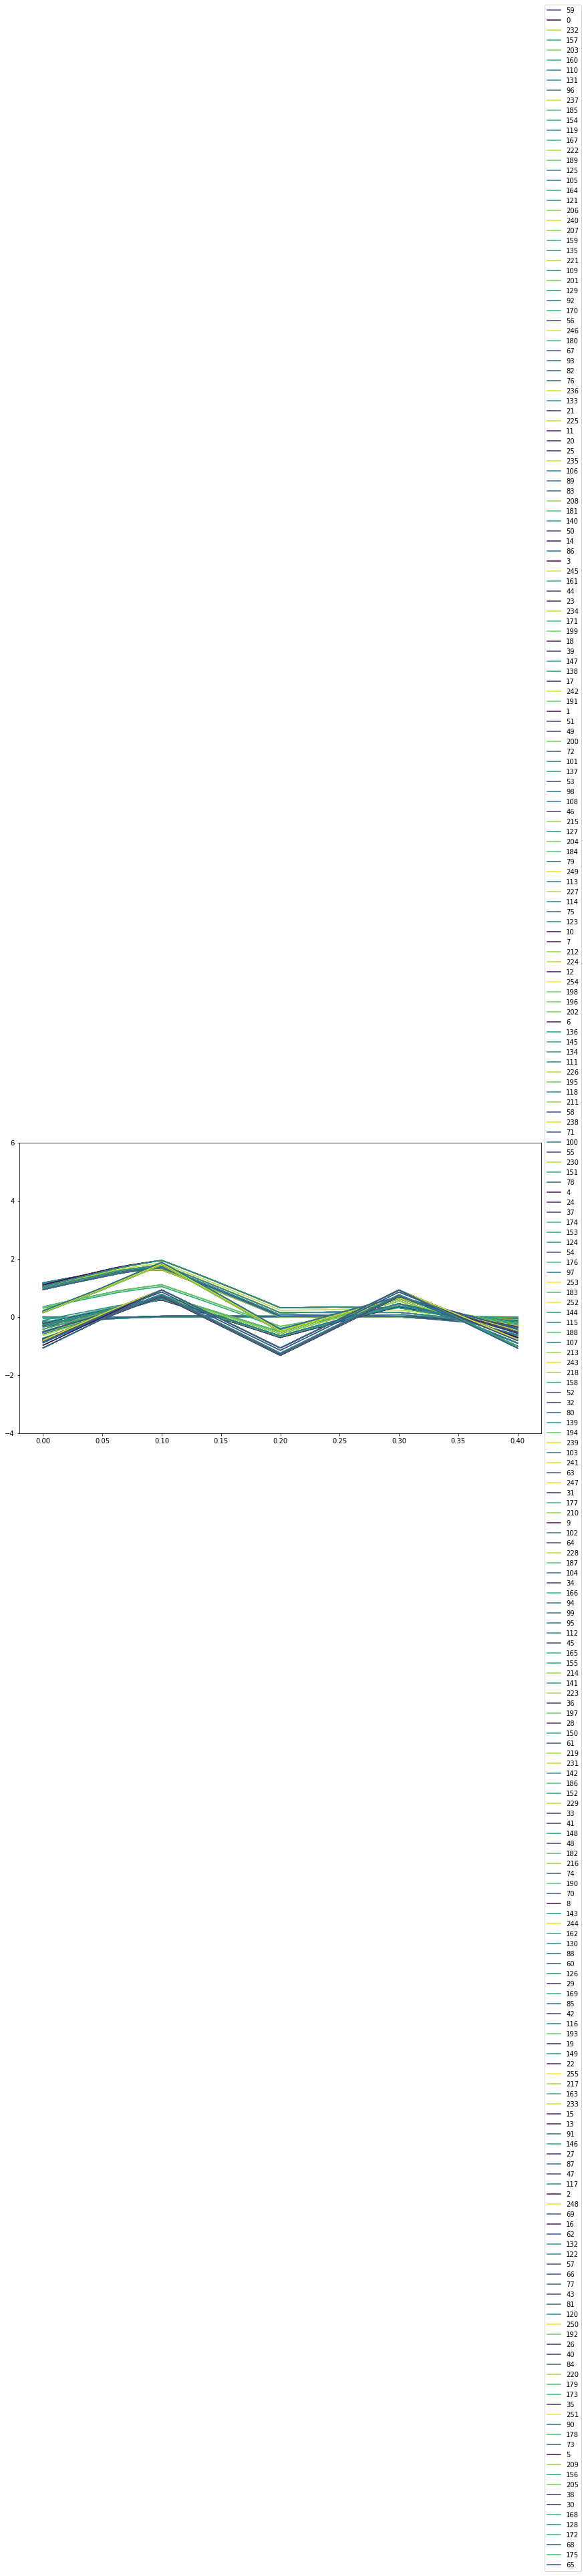

In [593]:
n = output2.shape[1]
indices = list(range(n))
# inplace shuffle
random.shuffle(indices)
colors = plt.cm.viridis(np.linspace(0,1,n))

summed = 0
plt.figure(figsize=(14,8))
for o in indices:
    summed += output2.numpy()[:,o] * model.layers[2].get_weights()[0][o]
    plt.plot(t, summed, color=colors[o], label=f'{o}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.plot(t, old_summed, 'k--', alpha=0.8)

plt.ylim(-4,6)

In [594]:
final = summed + model.layers[2].get_weights()[1]

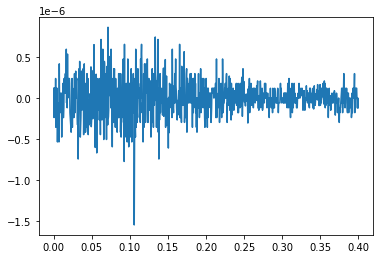

In [595]:
# why isn't this the same?
plt.plot(t, final-yhat[:,0])

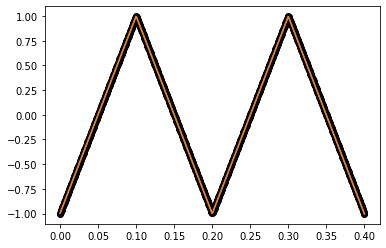

In [596]:
plt.figure()
plt.plot(t, triangle, 'k-o')
plt.plot(t, final)
plt.plot(t, yhat)

# try deeper network

In [597]:
def build_model(activation='relu', kernel_initializer='glorot_normal'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(2, input_shape=(1,), activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(32, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(16, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(2, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(16, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(32, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(256, activation=activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(1)
    ])
    return model

In [598]:
# kernel_initializer='glorot_uniform'
kernel_initializer='he_uniform'
model = build_model(activation='relu', kernel_initializer=kernel_initializer)

In [599]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_507 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_508 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_509 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_510 (Dense)            (None, 2)                 34        
_________________________________________________________________
dense_511 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_512 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_513 (Dense)            (None, 256)             

In [600]:
opt = tf.keras.optimizers.Adam(amsgrad=False)
model.compile(loss='mse', optimizer=opt)

In [601]:
%%time
history = model.fit(t[:,np.newaxis], triangle[:,np.newaxis], epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 928us/step - loss: 0.3375
Epoch 2/1000
32/32 [==============================] - 0s 955us/step - loss: 0.3061
Epoch 3/1000
32/32 [==============================] - 0s 992us/step - loss: 0.2913
Epoch 4/1000
32/32 [==============================] - 0s 950us/step - loss: 0.2801
Epoch 5/1000
32/32 [==============================] - 0s 922us/step - loss: 0.2660
Epoch 6/1000
32/32 [==============================] - 0s 862us/step - loss: 0.2684
Epoch 7/1000
32/32 [==============================] - 0s 905us/step - loss: 0.2422
Epoch 8/1000
32/32 [==============================] - 0s 887us/step - loss: 0.2552
Epoch 9/1000
32/32 [==============================] - 0s 961us/step - loss: 0.2513
Epoch 10/1000
32/32 [==============================] - 0s 973us/step - loss: 0.2640
Epoch 11/1000
32/32 [==============================] - 0s 881us/step - loss: 0.2359
Epoch 12/1000
32/32 [==============================] - 0s 806us/step - loss: 0.2157
E

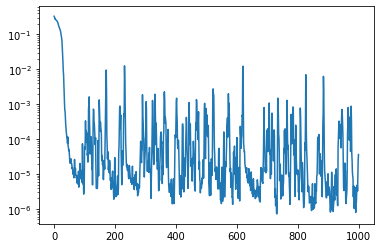

In [602]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

In [603]:
yhat = model.predict(t)

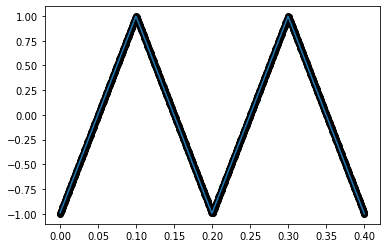

In [604]:
plt.figure()
plt.plot(t, triangle, 'k-o')
plt.plot(t, yhat)

# try autoencoder

In [605]:
triangle.shape

(1000,)

In [606]:
def build_and_fit_autoencoder(train_y, activation='relu'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, input_shape=(train_y.shape[1],), activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(2, activation=activation),
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(256, activation=activation),
        tf.keras.layers.Dense(train_y.shape[1])
    ])
    opt = tf.keras.optimizers.Adam(amsgrad=True)
    model.compile(loss='mse', optimizer=opt)
    history = model.fit(train_y, train_y, epochs=1000)
    return history, model

In [607]:
%%time
history, model = build_and_fit_autoencoder(triangle[:, np.newaxis])

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2864
Epoch 2/1000
32/32 [==============================] - 0s 992us/step - loss: 0.0821
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 4/1000
32/32 [==============================] - 0s 831us/step - loss: 9.7460e-05
Epoch 5/1000
32/32 [==============================] - 0s 898us/step - loss: 8.9624e-06
Epoch 6/1000
32/32 [==============================] - 0s 825us/step - loss: 2.7762e-06
Epoch 7/1000
32/32 [==============================] - 0s 871us/step - loss: 2.0943e-06
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 1.4967e-06
Epoch 9/1000
32/32 [==============================] - 0s 803us/step - loss: 3.2676e-06
Epoch 10/1000
32/32 [==============================] - 0s 964us/step - loss: 5.5377e-06
Epoch 11/1000
32/32 [==============================] - 0s 1ms/step - loss: 4.1573e-06
Epoch 12/1000
32/32 [==============================] - 0s 1ms

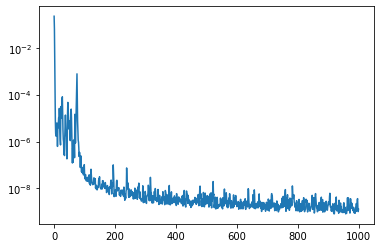

In [608]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

In [609]:
yhat = model.predict(triangle[:, np.newaxis])

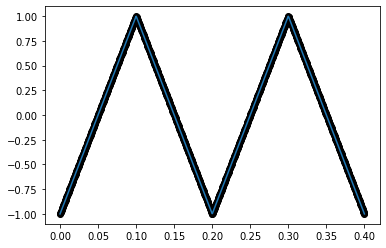

In [610]:
plt.figure()
plt.plot(t, triangle, 'k-o')
plt.plot(t, yhat)

# try autoencoder but with the input being the x-axis

In [611]:
t.shape

(1000,)

In [612]:
triangle.shape

(1000,)

In [613]:
def build_and_fit_autoencoder_2(train_x, train_y, activation='relu'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(2, input_shape=(train_x.shape[1],), activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(2, activation=activation),
        tf.keras.layers.Dense(16, activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(256, activation=activation),
        tf.keras.layers.Dense(train_y.shape[1])
    ])
    opt = tf.keras.optimizers.Adam(amsgrad=False)
#     opt = tf.keras.optimizers.Adamax()
#     opt = tf.keras.optimizers.Adagrad()
#     opt = tf.keras.optimizers.Adadelta()
#     opt = tf.keras.optimizers.RMSprop()
#     opt = tf.keras.optimizers.SGD()
    model.compile(loss='mse', optimizer=opt)
    history = model.fit(train_x, train_y, epochs=1000)
    return history, model

In [614]:
%%time
history, model = build_and_fit_autoencoder_2(t[:, np.newaxis], triangle[:, np.newaxis])

Epoch 1/1000
32/32 [==============================] - 0s 975us/step - loss: 0.3273
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3406
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3290
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3242
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3091
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2813
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.2602
Epoch 8/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.2635
Epoch 9/1000
32/32 [==============================] - 0s 956us/step - loss: 0.2667
Epoch 10/1000
32/32 [==============================] - 0s 798us/step - loss: 0.2603
Epoch 11/1000
32/32 [==============================] - 0s 890us/step - loss: 0.2582
Epoch 12/1000
32/32 [==============================] - 0s 837us/step - loss: 0.2465
Epoch 13/1000
3

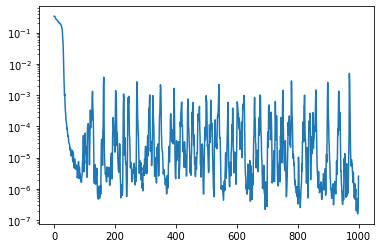

In [615]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

In [616]:
yhat = model.predict(t[:, np.newaxis])

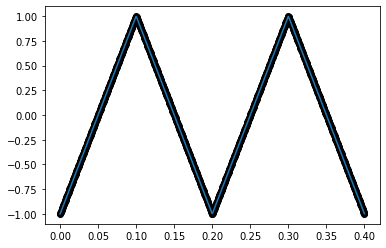

In [617]:
plt.figure()
plt.plot(t, triangle, 'k-o')
plt.plot(t, yhat)